<a href="https://colab.research.google.com/github/foramkavathiya/Projects/blob/main/Student_Perfromance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
!pip install  dabl

     |████████████████████████████████| 563kB 8.5MB/s 
     |████████████████████████████████| 22.3MB 1.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [9]:
import  dabl

Target looks like regression


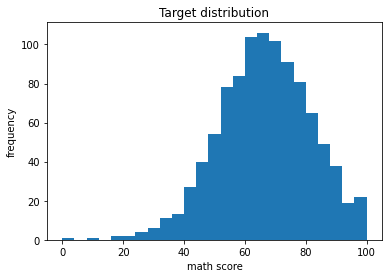

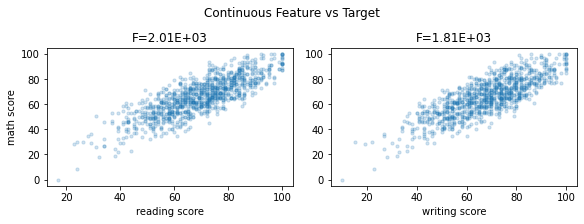

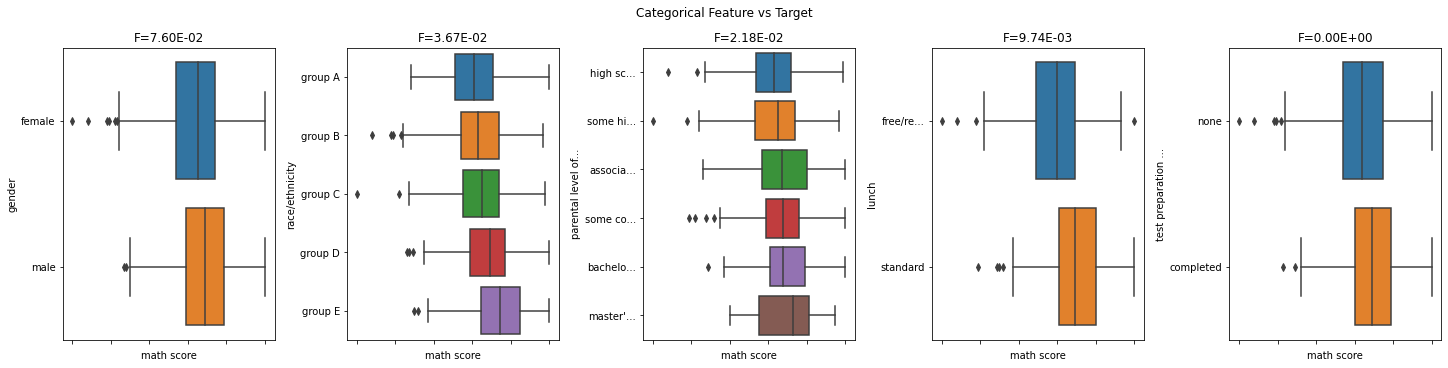

In [10]:
dabl.plot(data, target_col = 'math score')

In [11]:
data[['test preparation course', 'gender', 'math score', 'reading score', 'writing score']].groupby(['test preparation course', 'gender']).agg('median')

math score  reading score  writing score
test preparation course gender                                          
completed               female          67             78             79
                        male            73             71             70
none                    female          62             71             70
                        male            67             63             60

Text(0.5, 1.0, 'Comparison of Males and Females')

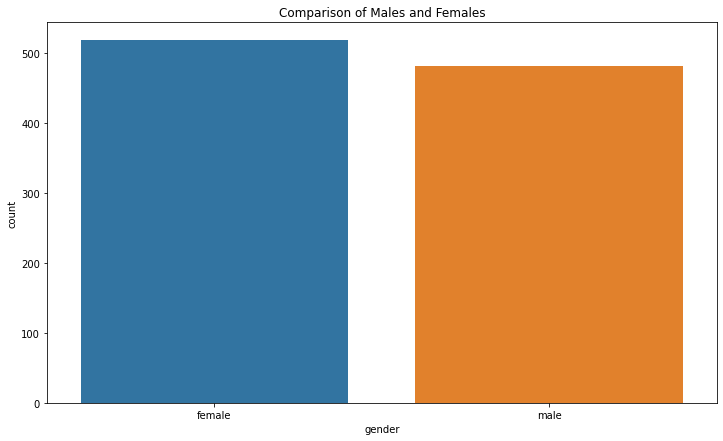

In [12]:
plt.figure(figsize = (12,7))
sns.countplot(x= 'gender', data = data)
plt.title('Comparison of Males and Females', fontweight = 30)

Text(0.5, 1.0, 'Comparison of various groups')

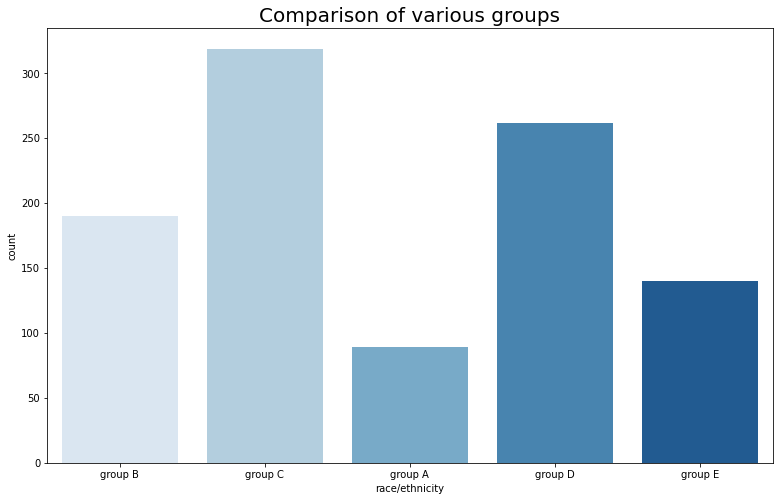

In [13]:
plt.figure(figsize= (13,8))
sns.countplot(x = 'race/ethnicity' , data = data, palette = 'Blues')
plt.title('Comparison of various groups', fontsize = 20)

Text(0.5, 1.0, 'Comparison of Parental Education')

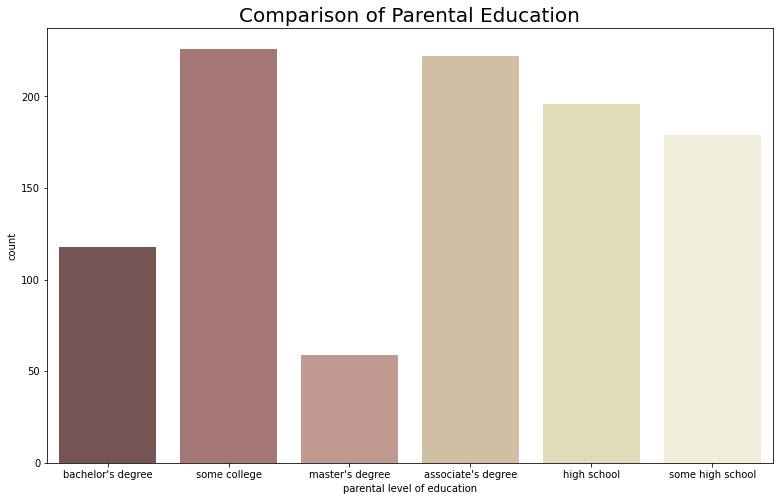

In [14]:
plt.figure(figsize= (13,8))
sns.countplot(x = 'parental level of education' , data = data, palette = 'pink')
plt.title('Comparison of Parental Education', fontsize = 20)

In [15]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']

Text(0.5, 1.0, 'Total score scored by students')

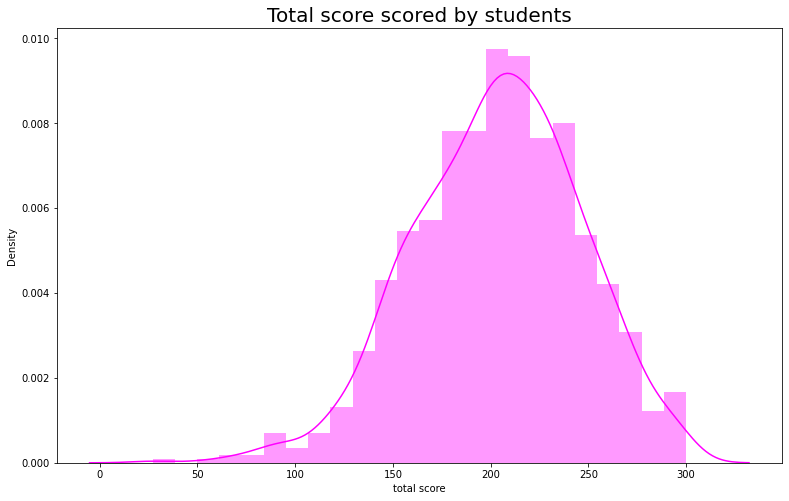

In [16]:
plt.figure(figsize= (13,8))
sns.distplot(data['total score'], color = 'magenta')
plt.title('Total score scored by students', fontsize = 20)

In [17]:
data['percentage'] = data['total score'] / 3

In [18]:
from math import *
for i in range(0,1000):
  data['percentage'][i] = ceil(data['percentage'][i])

Text(0.5, 1.0, 'Total percentage')

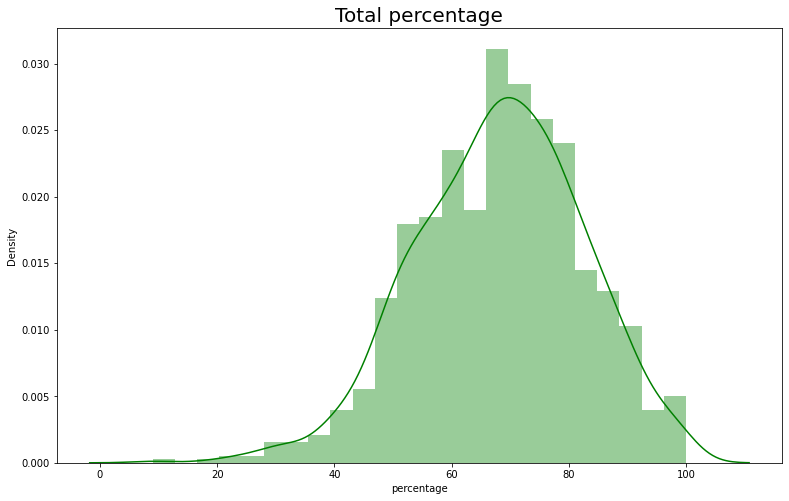

In [19]:
plt.figure(figsize= (13,8))
sns.distplot(data['percentage'], color = 'green')
plt.title('Total percentage', fontsize = 20)

In [20]:
def getgrade(percentage):
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'


In [21]:
data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1 )

In [22]:
data['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
data['gender'] = le.fit_transform(data['gender'])

In [26]:
data['gender'].unique()

array([0, 1])

In [27]:
data['lunch'] = le.fit_transform(data['lunch'])

In [28]:
data['lunch'].unique()

array([1, 0])

In [29]:
data['parental level of education'] = le.fit_transform(data['parental level of education'])

In [30]:
data['parental level of education'].unique()

array([1, 4, 3, 0, 2, 5])

In [31]:
data['test preparation course'] = le.fit_transform(data['test preparation course'])

In [32]:
data['test preparation course'].unique()

array([1, 0])

In [33]:
data['grades'] = data['grades'].replace('O', 1)
data['grades'] = data['grades'].replace('A', 2)
data['grades'] = data['grades'].replace('B', 3)
data['grades'] = data['grades'].replace('C', 4)
data['grades'] = data['grades'].replace('D', 5)
data['grades'] = data['grades'].replace('E', 6)

In [34]:
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

In [35]:
data['race/ethnicity'].unique()

array([2, 3, 1, 4, 5])

In [36]:
def stat(percentage):
  if(percentage>=40):
    return 'Pass'
  else:
    return 'Fail'

In [37]:
data['status'] = data.apply(lambda x : stat(x['percentage']), axis = 1)

In [38]:
data['status'].unique()

array(['Pass', 'Fail'], dtype=object)

In [39]:
data['status'] = le.fit_transform(data['status'])

In [40]:
X = data.drop('status', axis=1)

In [41]:
y= data['status']

In [42]:
X.shape

(1000, 11)

In [43]:
X.dtypes

gender                           int64
race/ethnicity                   int64
parental level of education      int64
lunch                            int64
test preparation course          int64
math score                       int64
reading score                    int64
writing score                    int64
total score                      int64
percentage                     float64
grades                           int64
dtype: object

In [44]:
y.shape

(1000,)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3) 

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
mms = MinMaxScaler()

In [49]:
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA()

In [52]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [53]:
explained_var = pca.explained_variance_ratio_

In [54]:
explained_var

array([2.91746788e-01, 2.11909498e-01, 1.93318130e-01, 1.26985836e-01,
       1.04111107e-01, 6.44944448e-02, 3.55967712e-03, 2.74339607e-03,
       1.12252018e-03, 8.60294356e-06, 1.02331750e-32])

In [55]:
pca = PCA(n_components= 2)

In [56]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred = lr.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [63]:
accuracy_score(y_pred,y_test)

0.9566666666666667

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier()

In [70]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
y_pred = rfc.predict(X_test)

In [72]:
accuracy_score(y_pred, y_test)

0.9766666666666667

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtc = DecisionTreeClassifier()

In [75]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
y_pred = dtc.predict(X_test)

In [77]:
accuracy_score(y_pred, y_test)

0.9833333333333333